# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [174]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs
reload(vs)

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(data.shape[0], data.shape[1])
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [172]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [70]:
# import seaborn as sns
# sns.heatmap(data.corr())

# print data.corr()
print data.keys()

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')


In [71]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [3,201,409]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,4484,14399,24708,3549,14235,1681
2,8708,3634,6100,2349,2123,5137


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:** COME BACK TO THIS

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [72]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor


feature_to_predict = "Fresh"
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop([feature_to_predict], axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature_to_predict])

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print "F:{} S:{}".format(feature_to_predict,score)

F:Fresh S:-1.19113649251


### Question 2

* Which feature did you attempt to predict?
* What was the reported prediction score?
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
1. Fresh
2. -0.662799049962
3. Yes, having a negative score indicated to me that the remaining features do not provide enough infomration to be able to predict the consumption of Fresh products

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

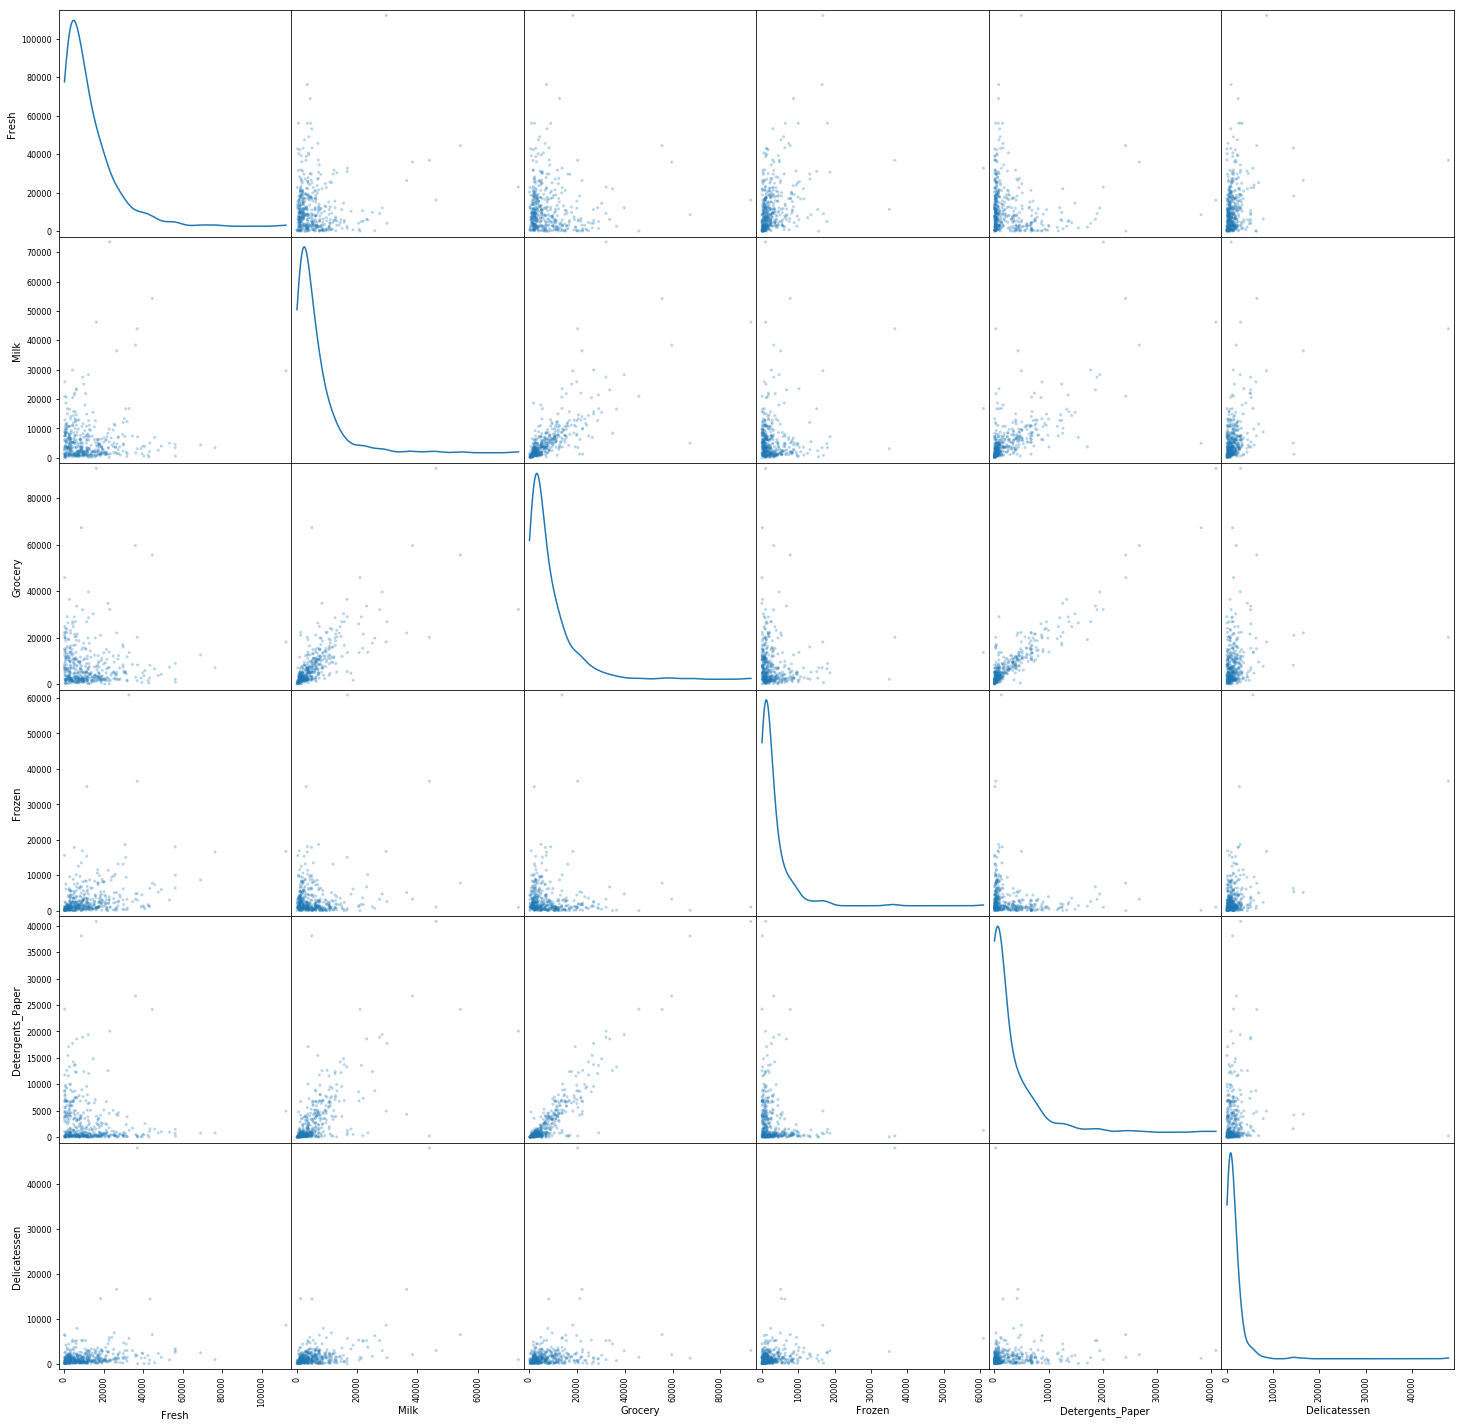

In [73]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = .3, figsize = (25,25), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.


# Vizulizations and analysis to answer Question 3

## Understanding further the data distribution

### First we can view the same scatter matrix to better understand the distributions with the KDE's

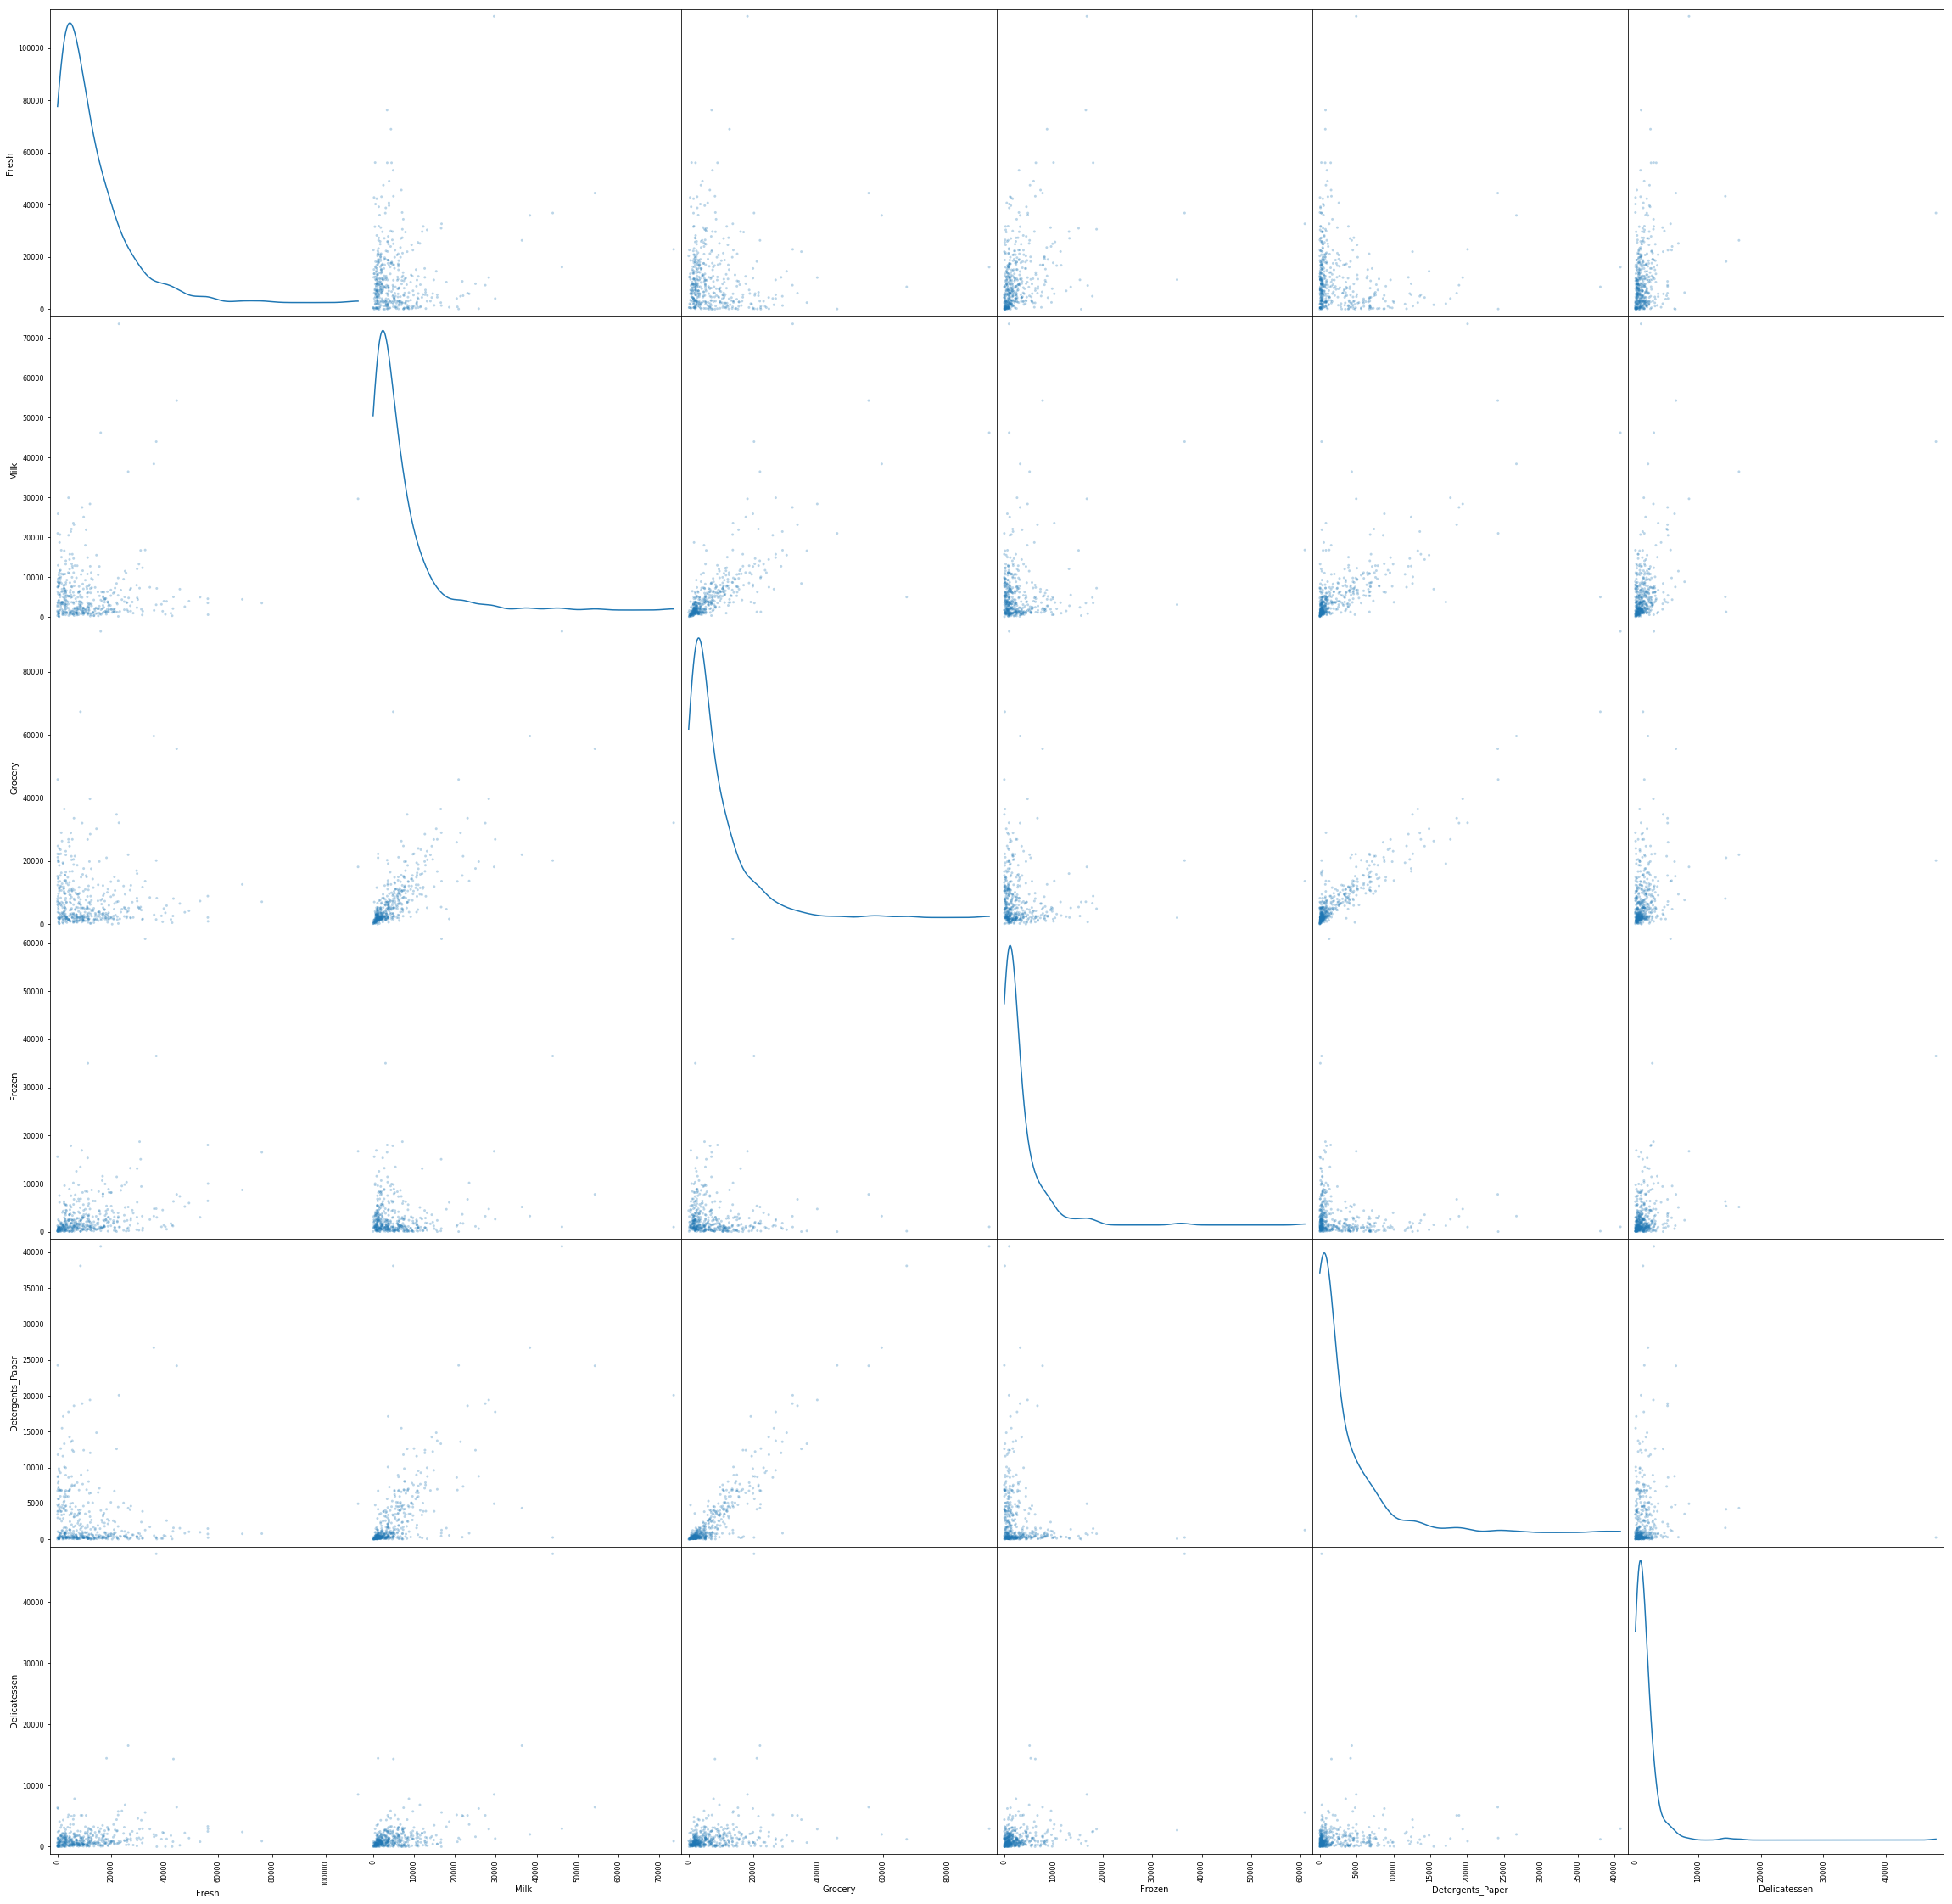

In [74]:
pd.plotting.scatter_matrix(data, alpha = .3, figsize = (40,40), diagonal = 'kde');

### Now we can look at two other plots to better understand the distributions

1. First we look at a box plot (on the left) which will give us a better vizu on where the majority of the data is by showing us various interquantile ranges as well as outliers
2. The point distribution can be seen even better with another similar plot known as a swarm matrix (on the right)

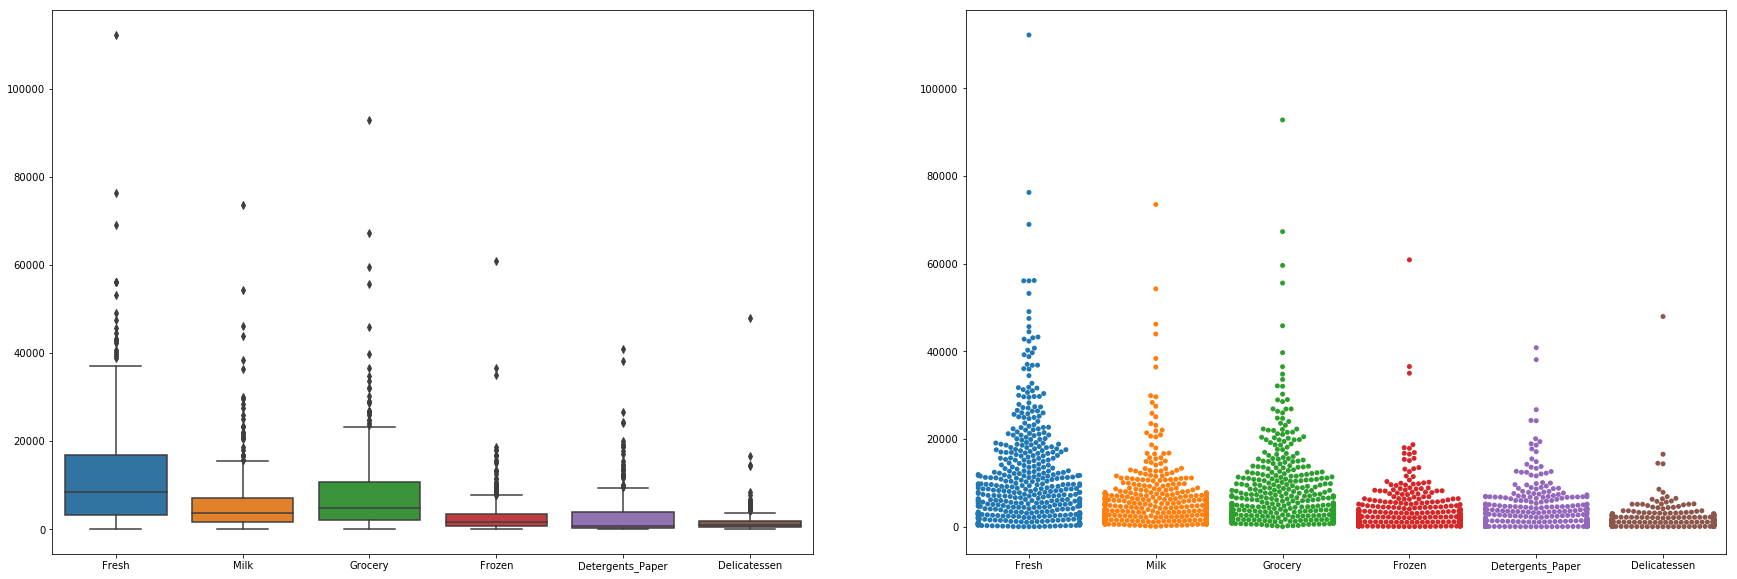

In [75]:
import matplotlib.pyplot as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
sns.boxplot(data=data, ax=ax1)
sns.swarmplot(data=data, ax=ax2)


### Quantifying the outliers

- We know from the box plots we have possible outliers. How many of them are there? 
    - We know that the outliers are defined on a box plot as 1.5x of the upper quartile (top part of the box) --> values >= third quartile + 1.5 IQR where IQR is defined as thirdQ - firstQ. Lets see this in code below 
    

In [76]:
outliers = []
for f in data.keys():
    q1 = np.percentile(data[f], 25)
    q3 = np.percentile(data[f], 75)
    iqr = q3 - q1 
    outlier_threshold = q3 + 1.5 * iqr
    number_of_outliers = data[data[f] >= outlier_threshold][f].count()
    outliers.append(number_of_outliers)
    print "Number of outliers for feature {}: {}".format(f, number_of_outliers)

Number of outliers for feature Fresh: 20
Number of outliers for feature Milk: 28
Number of outliers for feature Grocery: 24
Number of outliers for feature Frozen: 43
Number of outliers for feature Detergents_Paper: 30
Number of outliers for feature Delicatessen: 27


## Determining if there are any possible corralations between features

### Heatmap and Regression to view corralations between features

- Key point to notice is that grocery and detergents_paper are highly correlated (.92461) (as seen by the heatmap on the left)
- This corrlation can be further visuzulized by looking at a regression plot of comparing the two features (on the right).

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


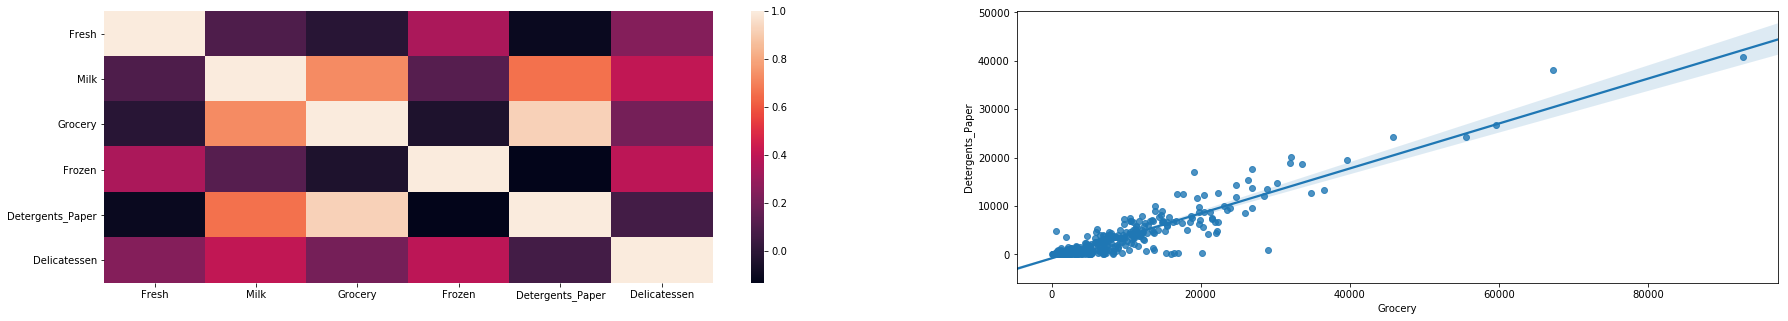

In [77]:
# Code For question 3 analysis 
import matplotlib.pyplot as plt
import seaborn as sns 
display(data.corr())
_, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,5))

sns.regplot(x='Grocery', y='Detergents_Paper',data=data,fit_reg=True, ax=ax2)
sns.heatmap(data.corr(),ax=ax1)

**Answer:**

Data Distribution:

1. *Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.*
    
    Firstly, from looking at the scatter matrix's diagnoal it seems very clear that a bulk of the data seems to be close to 0. To further understand this distribution, I decided to use two more plots - a box plot and a swarm plot. The box plot allows to see a few interesting insights: 
    - We can first see the median for all the features close to 0 (reletivly speaking) when looking at the entire range of values each feature takes
    - Second we can see vizually how many outliers we have for each feature. These are indicated by the "diamonds" aboce the upper fence of each features box plot. 
    - We can also notice where the upper quartile is for each box plot and make the conclusion that 75% of the data is below that value. Again showing further evidence that alot of the data is on the         lower end of the full range of values covered
    
    Continuing, the box plots revealed there there are outliers, but how many are there exactly? The cell below "Quantifying the outliers" quantifies just how many of the 440 data points we have for each feature are outliers. The insight to gain from this is the fact that Frozen products have many more outliers than any other category. The lowest number of outliers comes from fresh foods. This makes sense because very likely the industries purchasing fresh foods are likely very similar in scale so purchase with simialr purchasing power. Frozen foods may very highly depending on industry. For example, chain restaurants vs one off hotels.
    
2. Are there any pairs of features which exhibit some degree of correlation?
    
    To see if there are any corrlations between features I used 3 different methods (all showing the same results in a different way for..fun :) ). First I just found the corralations between all my features in a matrix form (tabular). This was a nice however if there were many more features this would be very hard to interpret. Next, I decided to do a heatmap represantion of the corralations - this gives a better represantation and idea of what features would be corrlated with one another. From this heatmap the insight we can gain is that Grocery and Deterdents_Paper are highly corralated. But what does this really mean? This is where I employed a regression plot to compare the two features further to better understand what it really meant for these two features to be corrlated.
    
    Ulimetly -- it seems as though Grocery and detergents_paper are the most highly corrlated features to one another.

    
3. Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
    
    Yes. From my analysis, I tested on the feature fresh and found we couldn't accuratley predict it with other features. WHen we look at the enire row of fresh on the heatmap, we can see why our model performed so poorly. The corrlations with fresh and any other feature are very low.
    
4. How is the data for those features distributed?
    
    As we can see from the scatter matrix, the distribution of fresh with other features is highly spread out with no real corralation in any direction of the data(this makes sense when you look back at the results of the heatmap).
    
    


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

In [123]:
a = [1,2,3]
b = [4,5,6]
print np.concatenate([a,b])

[1 2 3 4 5 6]


/Users/saifabid/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


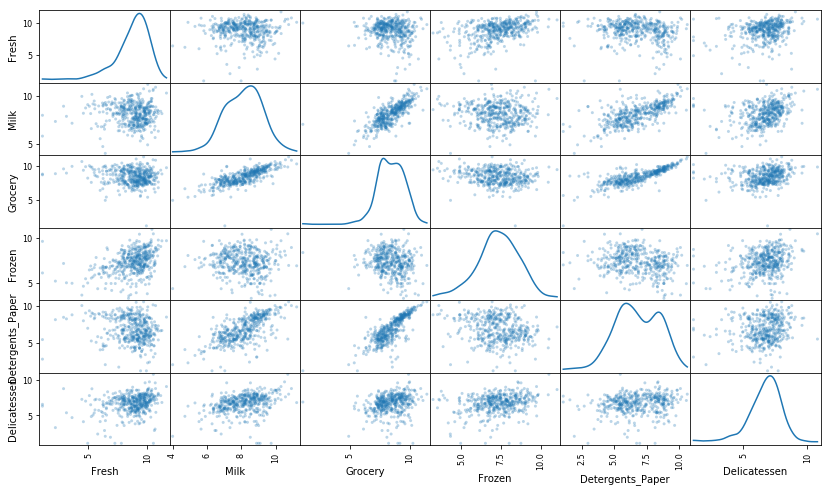

In [80]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [81]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
1,8.408271,9.574914,10.114882,8.174421,9.563459,7.427144
2,9.071997,8.198089,8.716044,7.761745,7.660585,8.544225


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [151]:
# For each feature find the data points with extreme high or low values
outliers = np.array([])
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    ran = np.array(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
    outliers = np.concatenate([outliers, ran])
   
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])


# outliers = pd.Series(outliers)
# outliers = outliers[outliers.duplicated()]
# print outliers
outliers = np.unique(outliers)
outliers = outliers.astype(np.integer)
print outliers
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)



Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[ 38  57  65  66  75  81  86  95  96  98 109 128 137 142 145 154 161 171
 175 183 184 187 193 203 218 233 264 285 289 304 305 325 338 343 353 355
 356 357 412 420 429 439]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

1. Are there any data points considered outliers for more than one feature based on the definition above?
    
    Yes there are points which were considered outliers for than one feature. The indicies of the points are : `[65  66  75 128 154]`
    
2. Should these data points be removed from the dataset?
    
    Yes they should. The reason is becasue say we were to cluster the points later on. If an outlier exists in the dataset, depending when calculating the error for the centroid before adjusting it, the outlier would casue a high error to occur. To reduce this the centroid may tend towards the outlier. This could lead to a situation which we dont want. Intuitivly it doenst make sense to have a cluster "ceneted" around your outlier. You will gain more information by having your clusters form based on the characteristics of the majority of the data
    
3. If any data points were added to the outliers list to be removed, explain why.

    I removed all points which which were identified as outliers. The primary reason I did this is explained above as aprt of 2), but to summerize - it's becasue when perofrming an analysis such as clustering, if outliers exsist (even in a few dimensions) they can casue a skew to occur in the loss function and result in the centroid tending towards the outlier. By having the centroid move away from the bulk of the data and more towards your outliers is not a good idea.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[ 4.10320197  1.85680266  0.86191133  0.80384844  0.40095686  0.19110812]
              Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Dimension 1 -0.0976  0.4109   0.4511 -0.1280            0.7595        0.1579
Dimension 2  0.6008  0.1370   0.0852  0.6300           -0.0376        0.4634
Dimension 3 -0.7452  0.1544  -0.0204  0.2670           -0.2349        0.5422
Dimension 4  0.2667  0.1375   0.0710 -0.7133           -0.3157        0.5445
Dimension 5  0.0114  0.7083   0.3168  0.0671           -0.4729       -0.4120
Dimension 6 -0.0543 -0.5177   0.8267  0.0471           -0.2080       -0.0094


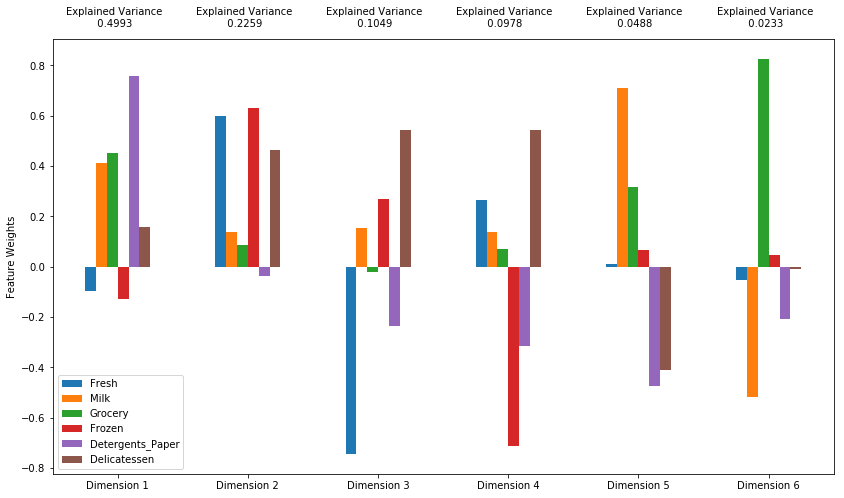

In [216]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
reload(vs)
from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(good_data)

print pca.explained_variance_
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

1. How much variance in the data is explained* in total *by the first and second principal component?

    Component 1 explains .4993 and component 2 explains .2259 -> the total variance explained by the first two components is .4993 + .2259 =  .7259 => 72.59% of the variance explained by the first two principle components

2. How much variance in the data is explained by the first four principal components?
    
    pc1: .4993
    
    pc2: .2259
    
    pc3: .1049
    
    pc4:  .0978
    
    pc1+pc2+pc3+pc4 = .9279 => 92.79% of the total variance is explained by the first 4 components
    
3. Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

    - Principle component 1
        - Variance ratio explained: 49.93% of the data's variance is represeanted by this component
        - The actual variance explained by this component is: 4.10320196892
        - From looking at the graph we can extract some key insights:
            1. The height feature weight is postiive and with Detergents_Paper. What this indicates is that the first principle component is highly and positivly corrlated with the purchasing of Detergents_Paper. 
            2. To interpret this further, we can note how Milk and Grocery are also positivly corrlated fairly highly with the first principle component. Becasue detergents_paper, milk and grocery's are all highly corrlated with the first PC, we can also conclude they are corrlated with each other. That is to say so far this component represents customers who, when increasing their spending on milk will also have increased spending on Groceries and Detergents_Paper.
            3. It's also worth mentioning the fact that Fresh and Frozen are negativly corrlated with this component. What this tells us is that as customers spend more and more on milk, detergents_paper and groceries (as the spending increases) their spending on fresh and frozen seems to decrease (as indicated by the negative corrlation)
        
    - Principle compoenent 2
        - Variance ratio explained: 22.59% of the data's variance is represeanted by this component
        - The actual variance explained by this component is: 1.85680266
        - From looking at the graph we can extract some key insights:
            1. First we can see Fresh, Frozen and Delicatessen are are all highly (positivly) corrlated with this compoenent. Although this captures only 22.59% of the variance, what this component likly represants are customers who whose spending on Fresh Frozen and Delicatessen is relateable by the positive corrlation (when spending on fresh increases, spending on frozen also increases as does Delicatessen `[and vise-versa for when spending decreases for one of these types of items]`)
            
     - Principle component 3
        - Variance ratio explained: 10.49% of the data's variance is represeanted by this component
        - The actual variance explained by this component is: 0.86191133
        - Insights
            1. In this component, we see a very high negative corrlation between the principle component and Fresh products, yet we see a high positive corrlation between the component and Delicatessen and the principle compoenent. What we can infer from this is that (while keeping in mind this principle component only captures 10% of the variance) this would represant customers who when increase their spending on Delicatessen will spend less on Fresh products (the two are inversly proportional)
            
      - Principle component 4
        - Variance ratio explained: 9.78% of the data's variance is represeanted by this component
        - The actual variance explained by this component is: 0.80384844
        - Insights
            1. In this compoenent we see some interesting details  Delicatessen is positivly correlated with the component axis as is Fresh(although slighly less) and frozen and detergents_paper is highly negativly corrlated with the principle component. The insight to drive from this component is that it's represanting customers whose spending when increasing with Delicatessen will also increase in Fresh products. That said, when increased spending in Deli. and Fresh occurs, due to the negative corrlation, less spending will occur on Frozen and detergents_paper
        
    - Principle component 5
        - Variance ratio explained: 4.88% of the data's variance is represeanted by this component
        - The actual variance explained by this component is: 0.40095686
        - Insights
            1. We can see high (+) feature weights associted with Milk and Grocery products while high, yet negative feature weights assoc with Detergents_Paper and Delicatessen. From this the main conclusion to drive is that this would represant customers whose Milk and grocery spending is postivly corrlated (meaning when spending for milk increases, we should see grocery spending increase also) yet they are negativly corrlated with detergents_paper and delicatessen products (as spending for milk and grocery increases, spending for detergents_paper and delicatessan products decreases and vise versa)
            0.19110812
     - Principle component 6
        - Variance ratio explained: 2.33% of the data's variance is represeanted by this component
        - The actual variance explained by this component is: 0.19110812
        - Insights:
            1. From this component, although it represants only 2.33% of the variance in the data we can see a very high _positive_ corrlation with the componenet and groceries while a very high _negative_ corrlation with Milk and the component. The key insight to drive from what this component is capturing is the customer's whose purchasing habits for milk and groceries are inversially proportional to one another. That is as spending on one of the features increases, it decreases for the other.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [ ]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [ ]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = None

# TODO: Transform the good data using the PCA fit above
reduced_data = None

# TODO: Transform log_samples using the PCA fit above
pca_samples = None

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [ ]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

In [ ]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [ ]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = None

# TODO: Predict the cluster for each data point
preds = None

# TODO: Find the cluster centers
centers = None

# TODO: Predict the cluster for each transformed sample data point
sample_preds = None

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = None

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [ ]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [ ]:
# TODO: Inverse transform the centers
log_centers = None

# TODO: Exponentiate the centers
true_centers = None

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [ ]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

**Answer:**

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [ ]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.